In [1]:
# Extract ERP for each year (Estimated Residential Population)
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034 Tutorial 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

"""
erp_predicted = spark.read.csv("../../generic-real-estate-consulting-project-group-43/data/curated/feature_prediction/22_27_population.csv", header=True)

erp_predicted = erp_predicted.withColumn("pred",erp_predicted["pred"].cast(IntegerType()))

erp_predicted.printSchema()

# Victoria state data only
erp_agg = erp_predicted.groupBy('year').sum('pred').alias('pred')

erp_agg.withColumnRenamed("sum(pred)","pred")

plt.plot(erp_agg['year'],erp_agg['pred'])
plt.title('title name')
plt.xlabel('Year')
plt.ylabel('ERP Predicted')
plt.show()
"""

22/09/29 23:34:49 WARN Utils: Your hostname, DESKTOP-BPM476M resolves to a loopback address: 127.0.1.1; using 172.25.156.254 instead (on interface eth0)
22/09/29 23:34:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/29 23:34:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


'\nerp_predicted = spark.read.csv("../../generic-real-estate-consulting-project-group-43/data/curated/feature_prediction/22_27_population.csv", header=True)\n\nerp_predicted = erp_predicted.withColumn("pred",erp_predicted["pred"].cast(IntegerType()))\n\nerp_predicted.printSchema()\n\n# Victoria state data only\nerp_agg = erp_predicted.groupBy(\'year\').sum(\'pred\').alias(\'pred\')\n\nerp_agg.withColumnRenamed("sum(pred)","pred")\n\nplt.plot(erp_agg[\'year\'],erp_agg[\'pred\'])\nplt.title(\'title name\')\nplt.xlabel(\'Year\')\nplt.ylabel(\'ERP Predicted\')\nplt.show()\n'

In [2]:
"""
# Extract ERP for each year (Estimated Residential Population)
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt

erp_predicted = spark.read.csv("../../generic-real-estate-consulting-project-group-43/data/curated/erp_vic.csv", header=True)

erp_predicted = erp_predicted.withColumn("erp_2013",erp_predicted["erp_2013"].cast(IntegerType()))\
                                .withColumn("erp_2014",erp_predicted["erp_2014"].cast(IntegerType()))\
                                .withColumn("erp_2015",erp_predicted["erp_2015"].cast(IntegerType()))\
                                .withColumn("erp_2016",erp_predicted["erp_2016"].cast(IntegerType()))\
                                .withColumn("erp_2017",erp_predicted["erp_2017"].cast(IntegerType()))\
                                .withColumn("erp_2018",erp_predicted["erp_2018"].cast(IntegerType()))\
                                .withColumn("erp_2019",erp_predicted["erp_2019"].cast(IntegerType()))\
                                .withColumn("erp_2020",erp_predicted["erp_2020"].cast(IntegerType()))\
                                .withColumn("erp_2021",erp_predicted["erp_2021"].cast(IntegerType()))

erp_predicted.printSchema()

# Graph the erp trend line to decide how to predict erp from 2022 - 2027
erp_agg = erp_predicted.groupby().sum().toPandas()

year = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

y_axis = erp_agg.iloc[0]

plt.plot(year,y_axis)
plt.title('Trend of population by year')
plt.xlabel('Year')
plt.ylabel('ERP Predicted')
plt.show()
"""

'\n# Extract ERP for each year (Estimated Residential Population)\nfrom pyspark.sql import SparkSession\nfrom pyspark.sql.functions import *\nfrom pyspark.sql.types import IntegerType\nimport matplotlib.pyplot as plt\n\nerp_predicted = spark.read.csv("../../generic-real-estate-consulting-project-group-43/data/curated/erp_vic.csv", header=True)\n\nerp_predicted = erp_predicted.withColumn("erp_2013",erp_predicted["erp_2013"].cast(IntegerType()))                                .withColumn("erp_2014",erp_predicted["erp_2014"].cast(IntegerType()))                                .withColumn("erp_2015",erp_predicted["erp_2015"].cast(IntegerType()))                                .withColumn("erp_2016",erp_predicted["erp_2016"].cast(IntegerType()))                                .withColumn("erp_2017",erp_predicted["erp_2017"].cast(IntegerType()))                                .withColumn("erp_2018",erp_predicted["erp_2018"].cast(IntegerType()))                                .withColumn("erp

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Define external predictors
external_preds = ['sa2_2021', 'min_distance_to_cbd','min_distance_to_park', 'min_distance_to_prim', 'min_distance_to_second'\
    , 'min_distance_to_train', 'min_distance_to_hosp', 'min_distance_to_poli', 'min_distance_to_shop', 'gdp', 'saving_rate', 'income_per_person',\
        'crime_cases', 'population_density']

# Define internal predictors
internal_preds = ['residence_type', 'nbed', 'nbath', 'ncar']

# OLS regression function for Data analysis
def ols_regression(merged_df):
    # OLS Regression
    # External ----------------------------------------------------------------------------------------------------
    external_model = ols(formula = 'weekly_rent ~ sa2_2021 + min_distance_to_cbd + \
        min_distance_to_park + min_distance_to_prim + min_distance_to_second + min_distance_to_train +\
        min_distance_to_hosp + min_distance_to_poli + min_distance_to_shop + gdp + saving_rate + income_per_person +\
        crime_cases + population_density', data = merged_df).fit()

    # Summary of external factors
    ex_summary = external_model.summary()

    print("Summary of external factors: ")
    print(ex_summary)

    # Anova table of external factors
    ex_anova_table = sm.stats.anova_lm(external_model, typ=2)

    print("Anova table of external factors: ")
    print(ex_anova_table)

    # Extract p-values for the predictors
    ex_pvals = external_model.pvalues[:]

    # Internal ----------------------------------------------------------------------------------------------------
    internal_model = ols(formula = 'weekly_rent ~ residence_type + nbed + nbath + ncar', data = merged_df).fit()

    # Summary of internal factors
    in_summary = internal_model.summary()

    print("Summary of internal factors: ")
    print(in_summary)

    # Anova table of internal factors
    in_anova_table = sm.stats.anova_lm(internal_model, typ=2)

    print("Anova table of internal factors: ")
    print(in_anova_table)

    # Extract p-values for the predictors
    in_pvals = internal_model.pvalues[:]

    return ex_pvals, in_pvals

# csv file function
def put_signigicants_csv(external_preds, ex_pvalues, internal_preds, in_pvalues, new_csv, ex_predictor_dict, in_predictor_dict):
    print(ex_pvalues, in_pvalues)
    sign_ex_predictors = [external_preds[(pre-1)] for pre in range(1, len(ex_pvalues)) if ex_pvalues[pre] < 0.05]

    sign_in_predictors = [internal_preds[(pre-1)] for pre in range(1, len(in_pvalues)) if in_pvalues[pre] < 0.05]
    
    external_df = pd.DataFrame({'Significant External predictors': sign_ex_predictors})
    internal_df = pd.DataFrame({'Significant Internal predictors': sign_in_predictors})
    new = pd.concat([external_df, internal_df], axis=1) 

    print(new_csv)
    new.to_csv(new_csv, index=False)
    # record the frequencies of significant predictors
    for predictor in sign_ex_predictors:
        ex_predictor_dict[predictor] += 1
    for predictor in sign_in_predictors:
        in_predictor_dict[predictor] += 1

In [4]:
# Make a new folder for significant variable csv files
import os
  
# Directory
directory = "significant"
  
# Parent Directory path
parent_dir = "../data/curated/"

# Path
new_path = os.path.join(parent_dir, directory)

if not os.path.exists(new_path):
    # Create the directory
    os.mkdir(new_path)

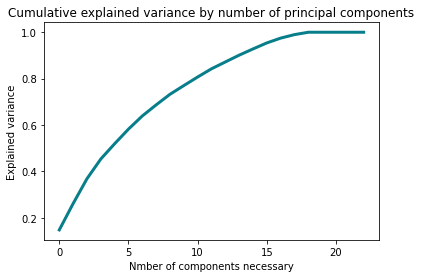

In [5]:
# Scrutinize the data with PCA: Test the attribute relevance
from heapq import merge
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

merged_df = spark.read.csv("../data/curated/merged_dataset/2013_merged_data.csv", header=True)
for c in merged_df.columns:
    if (c not in  ['address', 'residence_type']):
        merged_df = merged_df.withColumn(c,merged_df[c].cast(IntegerType())) 

merged_df = merged_df.toPandas()

merged_df['residence_type'] = merged_df['residence_type'].astype('category')
merged_df['residence_type'] = merged_df['residence_type'].cat.codes

merged_df.iloc[:, 13:21] = merged_df.iloc[:, 13:21].replace(np.nan, 99999)

merged_df = merged_df.dropna()

X = merged_df.drop(['address', 'weekly_rent'], axis=1)
y = merged_df['weekly_rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components')
plt.xlabel("Nmber of components necessary")
plt.ylabel("Explained variance")
plt.show()

In [6]:
# Scrutinize the data with PCA: Test the attribute relevance for only 2013 (For testing)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from csv import writer
import pandas as pd

merged_df.rename(columns = {'gdp(USD Millioins)':'gdp', 'saving_rate(% of GDP)':'saving_rate'}, inplace = True)

ex_pvalues, in_pvalues = ols_regression(merged_df)

Summary of external factors: 
                            OLS Regression Results                            
Dep. Variable:            weekly_rent   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     208.8
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:35:01   Log-Likelihood:                -53807.
No. Observations:                8566   AIC:                         1.076e+05
Df Residuals:                    8553   BIC:                         1.077e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [7]:
# Implement for every file to see annual trend
from collections import defaultdict
parent_dir = "../../generic-real-estate-consulting-project-group-43/data/curated/merged_dataset"
ex_predictor_dict = defaultdict(int)
in_predictor_dict = defaultdict(int)
for filename in os.listdir(parent_dir):
    print(filename, "----------------------------------------------------------------------------------------------------------------")
    merged_df_yr = spark.read.csv(parent_dir + "/" + filename, header=True)
    for c in merged_df_yr.columns:
        if (c not in  ['address', 'residence_type']):
            merged_df_yr = merged_df_yr.withColumn(c,merged_df_yr[c].cast(IntegerType())) 

    merged_df_yr = merged_df_yr.toPandas()

    merged_df_yr['residence_type'] = merged_df_yr['residence_type'].astype('category')
    merged_df_yr['residence_type'] = merged_df_yr['residence_type'].cat.codes

    #merged_df_yr.iloc[:, 13:21] = merged_df_yr.iloc[:, 13:21].replace(np.nan, 99999)

    merged_df_yr = merged_df_yr.dropna()

    merged_df_yr.rename(columns = {'gdp(USD Millioins)':'gdp', 'saving_rate(% of GDP)':'saving_rate'}, inplace = True)

    # Implement ols regression to analyze the data
    ex_pvalues, in_pvalues = ols_regression(merged_df_yr)
    
    new_csv_name = "../data/curated/significant/" + filename

    put_signigicants_csv(external_preds, ex_pvalues, internal_preds, in_pvalues, new_csv_name, ex_predictor_dict, in_predictor_dict)

2013_merged_data.csv ----------------------------------------------------------------------------------------------------------------
Summary of external factors: 
                            OLS Regression Results                            
Dep. Variable:            weekly_rent   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     208.8
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:35:02   Log-Likelihood:                -53807.
No. Observations:                8566   AIC:                         1.076e+05
Df Residuals:                    8553   BIC:                         1.077e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err  

In [8]:
print(sorted(in_predictor_dict.items(), key=lambda kv: kv[1], reverse=True)) # internal significant predictor counter
print(sorted(ex_predictor_dict.items(), key=lambda kv: kv[1], reverse=True)) # external significant predictor counter

[('residence_type', 10), ('nbed', 10), ('nbath', 10), ('ncar', 8)]
[('min_distance_to_cbd', 10), ('min_distance_to_train', 10), ('income_per_person', 10), ('crime_cases', 10), ('min_distance_to_prim', 9), ('population_density', 9), ('sa2_2021', 8), ('min_distance_to_hosp', 6), ('gdp', 5), ('saving_rate', 5), ('min_distance_to_park', 5), ('min_distance_to_second', 4), ('min_distance_to_shop', 4), ('min_distance_to_poli', 3)]
